<a href="https://colab.research.google.com/github/snanditachn/Nandita.S_cts/blob/main/Nandita_S_2211551_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Deep Learning with Keras and TensorFlow

Code for plotting the losses inline 

In [ ]:
%matplotlib inline

To help you understand the fundamentals of deep learning, this demo will walk through the basic steps of building two toy models for classifying handwritten numbers with accuracies surpassing 95%. The first model will be a basic fully-connected neural network, and the second model will be a deeper network that introduces the concepts of convolution and pooling.

## The task for the AI

The goal is to contruct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images. We will use the Keras Python API with TensorFlow as the backend.

## Prerequisite python models

First, some software needs to be loaded into the Python environment

In [ ]:
import numpy as np                                        # advanced math library, used to perform a wide variety of mathematical operations on arrays and matrices
import matplotlib.pyplot as plt                           # for plotting data
import random                                             # is a command that makes the plots generated by matplotlib show into the IPython shell that we are running and not in a separate output window.
%matplotlib inline

from keras.datasets import mnist                          # MNIST dataset is included in keras,  Keras acts as an interface for the TensorFlow library.
from keras.models import Sequential                       # model type is to be used

from keras.layers.core import Dense, Dropout, Activation  # types of layers to be used in our model
from keras.utils import np_utils                          # numpy related tools, used to convert array of labeled data(from 0 to nb_classes - 1 ) to one-hot vector.

The **MNIST dataset** is a built-in dataset provided by Keras. It consists of 70,000 28x28 grayscale images, each of which displays a single handwritten digit from 0 to 9. The training set consists of 60,000 images, while the test set has 10,000 images.

The core idea of **Sequential API** is simply arranging the Keras layers in a sequential order and so, it is called Sequential API. Most of the ANN also has layers in sequential order and the data flows from one layer to another layer in the given order until the data finally reaches the output layer.



## Loading Training Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [ ]:
# The MNIST data is split between 60,000 images(28 x 28 px) training images and 10,000 testing images (28 x 28 px)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


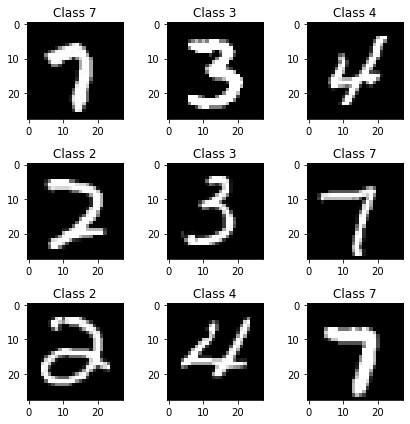

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)                           # Make the figures a bit bigger

for i in range(9):                                               # choosing 9 images
    plt.subplot(3,3,i+1)                                         # show images in 3 rows 3 columns format, each image is +1 from the before image
    num = random.randint(0, len(X_train))                        # num is picked randomly from 0, within the length of X_train
    plt.imshow(X_train[num], cmap='gray', interpolation='none')  # imshow() function is used to display data as an image; i.e. on a 2D regular raster.
    plt.title("Class {}".format(y_train[num]))                   # formatting the title of each image
    
plt.tight_layout()

Let's examine a single digit a little closer, and print out the array representing the last digit.

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        
matprint(X_train[num])

0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    9  116  119  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    4   37  247  254  226  0  0  0  


Highest is 255 and lowest is 0

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

## Formatting the input data layer

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

In [ ]:
X_train = X_train.reshape(60000, 784)  # reshape 60000 28 x 28 matrices into 60000 784 length vectors
X_test = X_test.reshape(10000, 784)    # reshape 10000 28 x 28 matrices into 10000 784 length vectors

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


We then modify our classes (unique digits) to be in the one-hot format, i.e.

0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]

1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.

If the final output of our network is very close to one of these classes, then it is most likely that class. For example, if the final output is:

[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]

then it is most probable that the image is that of the digit 1.

In [ ]:
nb_classes = 10                                           # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Building a 3-layer fully connected network (FCN)

**Fully Connected Layer** is simply, feed forward neural networks. Fully Connected Layers form the last few layers in the network. The input to the fully connected layer is the output from the final Pooling or Convolutional Layer, which is flattened and then fed into the fully connected layer.

A fully connected layer multiplies the input by a weight matrix and then adds a bias vector. The convolutional (and down-sampling) layers are followed by one or more fully connected layers. As the name suggests, all neurons in a fully connected layer connect to all the neurons in the previous layer.

A fully connected neural network consists of a series of fully connected layers that connect every neuron in one layer to every neuron in the other layer. The major advantage of fully connected networks is that they are “structure agnostic” i.e. there are no special assumptions needed to be made about the input.


One can build a fully connected feedforward neural network by stacking layers sequentially so that the output of one layer becomes the input to the next. In TensorFlow, layers are callable objects, which take tensors as input and generate outputs that are also tensors.



In [ ]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()

The first hidden layer

In [ ]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.

model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

In [ ]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu'))

In [ ]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.2))

Adding the second hidden layer

In [ ]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

The Final Output Layer

In [ ]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

In [ ]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

**ReLU** stands for Rectified Linear Unit.
Although it gives an impression of a linear function, ReLU has a derivative function and allows for backpropagation while simultaneously making it computationally efficient.
The main catch here is that the ReLU function does not activate all the neurons at the same time.
The neurons will only be deactivated if the output of the linear transformation is less than 0.


**Softmax** function is described as a combination of multiple sigmoids.
It calculates the relative probabilities. Similar to the sigmoid/logistic activation function, the SoftMax function returns the probability of each class.
It is most commonly used as an activation function for the last layer of the neural network in the case of multi-class classification.

In [ ]:
# Summarize the built model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

## Compiling the model

Keras is built on top of Theano and TensorFlow. Both packages allow you to define a computation graph in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your loss function and your optimizer. The loss function we'll use here is called categorical cross-entropy, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. 

The optimizer helps determine how quickly the model learns through gradient descent. The rate at which descends a gradient is called the learning rate.

So are smaller learning rates better? Not quite! It's important for an optimizer not to get stuck in local minima while neglecting the global minimum of the loss function. Sometimes that means trying a larger learning rate to jump out of a local minimum.

In [ ]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In machine learning, **Loss function** is used to find error or deviation in the learning process. Keras requires loss function during model compilation process. Keras provides quite a few loss function in the losses module.

mean_squared_error

mean_absolute_error

mean_absolute_percentage_error

mean_squared_logarithmic_error

squared_hinge

hinge

categorical_hinge

logcosh

huber_loss

categorical_crossentropy

sparse_categorical_crossentropy

binary_crossentropy

kullback_leibler_divergence

poisson

cosine_proximity

is_categorical_crossentropy

In machine learning, **Optimization** is an important process which optimize the input weights by comparing the prediction and the loss function. Keras provides quite a few optimizer as a module. 

SGD − Stochastic gradient descent optimizer.


RMSprop − RMSProp optimizer.


Adagrad − Adagrad optimizer.


Adadelta − Adadelta optimizer.


Adam − Adam optimizer.


Adamax − Adamax optimizer from Adam.


Nadam − Nesterov Adam optimizer.


In machine learning, **Metrics** is used to evaluate the performance of your model. It is similar to loss function, but not used in training process. Keras provides quite a few metrics as a module, metrics and they are as follows

accuracy

binary_accuracy

categorical_accuracy

sparse_categorical_accuracy

top_k_categorical_accuracy

sparse_top_k_categorical_accuracy

cosine_proximity

clone_metric


Here, we have used the following

loss function is set as **categorical_crossentropy**

optimizer is set as **Adam**

metrics is set as **accuracy**

## Train the model!

This is the fun part!

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!

In [ ]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.2455 - accuracy: 0.9267
Epoch 2/5
469/469 [==============================] - 9s 18ms/step - loss: 0.1015 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0713 - accuracy: 0.9779
Epoch 4/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0552 - accuracy: 0.9820
Epoch 5/5
469/469 [==============================] - 13s 28ms/step - loss: 0.0441 - accuracy: 0.9850


Models are trained by NumPy arrays using fit(). The main purpose of this fit function is used to evaluate your model on training. This can be also used for graphing model performance. It has the following syntax −


Here,

X_train, Y_train − It is a tuple to evaluate your data.

epochs − no of times the model is needed to be evaluated during training.

batch_size − training instances.

The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data. But how does it do on data it did not train on?

## Evaluate Model's Accuracy on Test Data

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0663 - accuracy: 0.9801
Test score: 0.06628072261810303
Test accuracy: 0.9800999760627747


**Evaluation** is a process during development of the model to check whether the model is best fit for the given problem and corresponding data. Keras model provides a function, evaluate which does the evaluation of the model. 

Here, the test accuracy is 98%. We have created a best model to identify the handwriting digits. On the positive side, we can still scope to improve our model.



## Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = np.argmax(model.predict(X_test), axis=-1)        # argmax returns indices of the max element of the the predict class X_test 

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 3ms/step


Prediction is the final step and our expected outcome of the model generation. Keras provides a method, predict to get the prediction of the trained model.

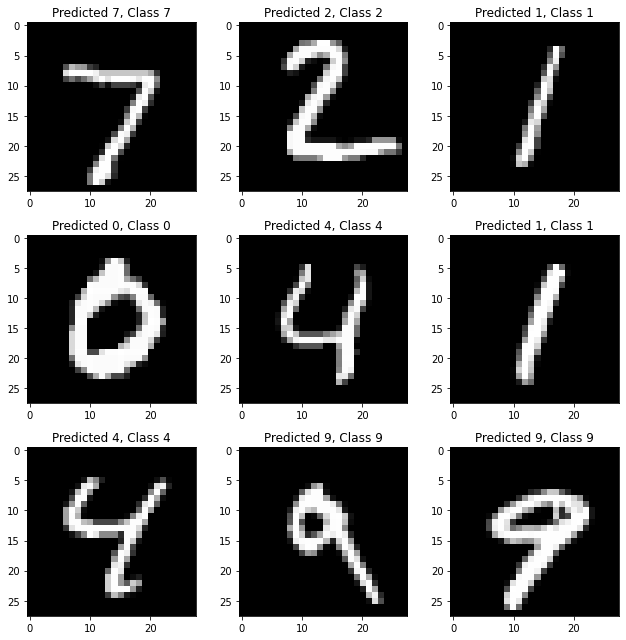

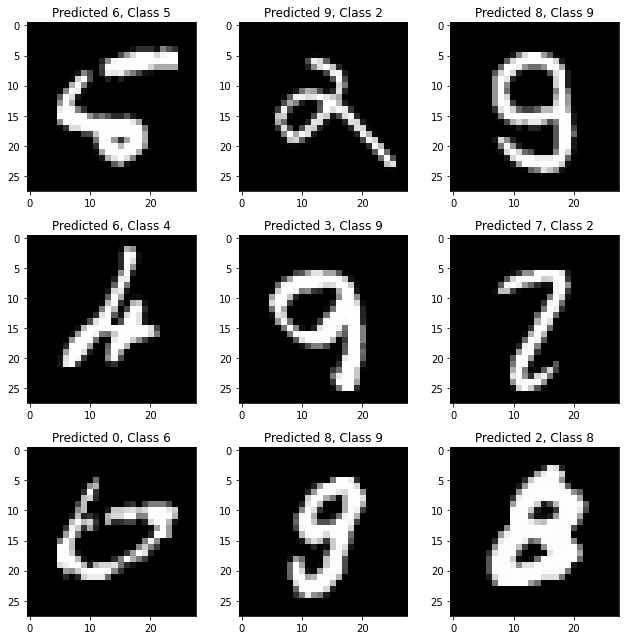

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

Trying experimenting with the batch size!
How does increasing the batch size to 10,000 affect the training time and test accuracy?
How about a batch size of 32?

## Introducing Convolution

Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. curvature, edges) of each image into a network, and have the network learn which features are important for classifying an image?

This possible through convolution! Convolution applies kernels (filters) that traverse through each image and generate feature maps.

Kernels in deep learning networks are used in similar ways, i.e. highlighting some feature. Combined with a system called max pooling, the non-highlighted elements are discarded from each feature map, leaving only the features of interest, reducing the number of learned parameters, and decreasing the computational cost (e.g. system memory).

We can also take convolutions of convolutions -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.

# Building a "Deep" Convolutional Neural Network

In [ ]:
# import some additional tools

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization


**Batch normalization**  is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.



In [ ]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
# one-hot format classes

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()                                 # Linear stacking of layers

Keras allows us to specify the number of filters we want and the size of the filters. So, in our first layer, 32 is **number of filters** and (3, 3) is the size of the filter. We also need to specify the shape of the input which is (28, 28, 1), but we have to specify it only once.

The second layer is the **Activation layer**. We have used ReLU (rectified linear unit) as our activation function. ReLU function is f(x) = max(0, x), where x is the input. It sets all negative values in the matrix ‘x’ to 0 and keeps all the other values constant. It is the most used activation function since it reduces training time and prevents the problem of vanishing gradients.

The third layer is the **MaxPooling layer**. MaxPooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce over-fitting. It also reduces the number of parameters to learn, reducing the training time.

It’s a best practice to always do** BatchNormalization**. BatchNormalization normalizes the matrix after it is been through a convolution layer so that the scale of each dimension remains the same. It reduces the training time significantly.

After creating all the convolutional layers, we need to flatten them, so that they can act as an input to the Dense layers.

**Dense layers** are keras’s alias for Fully connected layers. These layers give the ability to classify the features learned by the CNN.

**Dropout** is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In our model, dropout will randomnly disable 20% of the neurons.

The second last layer is the Dense layer with 10 neurons. The neurons in this layer should be equal to the number of classes we want to predict as this is the output layer.

The last layer is the **Softmax Activation layer**. Softmax activation enables us to calculate the output based on the probabilities. Each class is assigned a probability and the class with the maximum probability is the model’s output for the input.

In [ ]:
# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)


In [ ]:
# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

In [ ]:
# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

In [ ]:
# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector


In [ ]:
# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

In [ ]:
# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 24, 24, 32)       

In [ ]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

To reduce over-fitting, we use another technique known as **Data Augmentation.** Data augmentation rotates, shears, zooms, etc the image so that the model learns to generalize and not remember specific data. If the model overfits, it will perform very well on the images that it already knows but will fail if new images are given to it.



In [ ]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

We have to create batches, so that we use less memory. Moreover, we can also train our model faster by creating batches. Here we are using batch of 128, so the model will take 128 images at a time and train on them.

In [ ]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [ ]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size

# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


468/468 [==============================] - 210s 446ms/step - loss: 0.1369 - accuracy: 0.9573 - val_loss: 0.1141 - val_accuracy: 0.9669
Epoch 2/5
468/468 [==============================] - 210s 450ms/step - loss: 0.0495 - accuracy: 0.9844 - val_loss: 0.0330 - val_accuracy: 0.9896
Epoch 3/5
468/468 [==============================] - 212s 452ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0759 - val_accuracy: 0.9742
Epoch 4/5
468/468 [==============================] - 211s 452ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0370 - val_accuracy: 0.9883
Epoch 5/5
468/468 [==============================] - 210s 448ms/step - loss: 0.0303 - accuracy: 0.9902 - val_loss: 0.0200 - val_accuracy: 0.9945


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 10s 33ms/step - loss: 0.0200 - accuracy: 0.9945
Test score: 0.019960978999733925
Test accuracy: 0.9944999814033508


We achived 99.44% accuracy using this simple model. To improve the result, we can do ensembling of models. We can also use pseudo labelling to improve the accuracy.

**Ensemble modeling** is a process where multiple diverse models are created to predict an outcome, either by using many different modeling algorithms or using different training data sets. The ensemble model then aggregates the prediction of each base model and results in once final prediction for the unseen data.

**Pseudo labeling** is the process of adding confident predicted test data to your training data.